In [1]:
import torch

In [2]:
import numpy as np
import cv2
from IPython.display import display, Image ,clear_output
import time
import keyboard
import mediapipe as mp

In [3]:
def showVideo(img, fps=30):     
    _, en_image = cv2.imencode('.jpg',img)
    img_obj = Image(data = en_image)
    clear_output(True)
    display(img_obj)
    time.sleep(1/fps)

In [4]:
# Model
model = torch.hub.load('yolov5','custom', path='best1.pt',source='local')
#device = torch.device("cuda")
device = torch.device('cpu')
model.to(device)
print('ok')

YOLOv5  v6.0-255-gca0a007 torch 1.8.0 CPU

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


ok


In [7]:
video = cv2.VideoCapture('../../video_data/(001)spinning/NG4.mp4')
#video = cv2.VideoCapture('C:/Users/Michael_Lee/Documents/Project_private/CGMH/EST2022/video_data/(001)spinning/OK.mp4')
#video = cv2.VideoCapture('C:/Users/Michael_Lee/Documents/Project_private/CGMH/EST2022/video_data/(001)spinning/NG4.mp4')
classes = model.names
model.conf = 0.5
model.iou = 0.3
colors = [(0,255,0), (0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(255,86,86),(255,86,86)]
font = cv2.FONT_HERSHEY_SIMPLEX
prev_frame_time = 0
new_frame_time = 0
count = 0

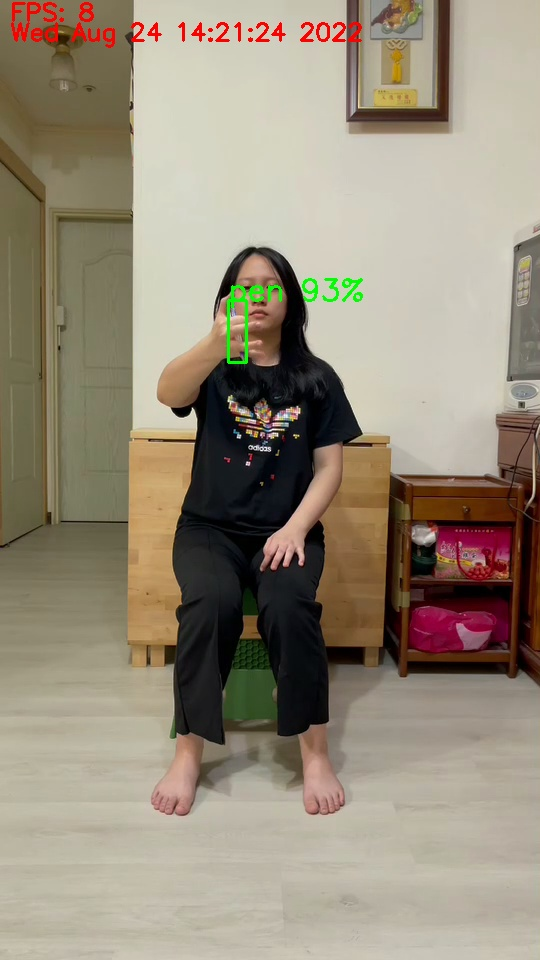

In [8]:
while video.isOpened():
    ret, image = video.read()
    if ret == False:
        break
    new_frame_time = time.time()
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    height, width, _ = image.shape
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image, size=640)
    labels, bbox = results.xyxyn[0][:,-1], results.xyxyn[0][:,:-1]
    if len(labels) > 0:
        for i in range(len(labels)):
            x1, y1 = bbox[i][0].item()*width, bbox[i][1].item()*height
            x2, y2 = bbox[i][2].item()*width, bbox[i][3].item()*height
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            label = classes[int(labels[i])]
            probability = int(bbox[i][4].item()*100)
            cv2.rectangle(image, (x1,y1), (x2,y2), colors[int(labels[i])], 2)
            cv2.putText(image,  label +" "+str(probability)+"%", (x1,y1), font, 1, colors[int(labels[i])],2)
                
    current_time = time.ctime(time.time())
    
    cv2.putText(image, "FPS: "+str(int(fps)), (10,20), font, 0.8, (255,0,0),2)
    cv2.putText(image, current_time, (10,40), font, 0.8, (255,0,0),2)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    showVideo(image, fps=30)
    count+=1
    if keyboard.is_pressed('esc'):
        video.release()
        break
video.release()